In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [3]:
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)

In [4]:
model.score(X_test, y_test)

0.8524590163934426

In [5]:
from sklearn.model_selection import cross_val_score

cv_score = np.array(cross_val_score(model, X, y, cv=5))
cv_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [6]:
cv_score.mean()

0.811639344262295

In [7]:
y_preds = model.predict(X_test)
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [9]:
y_probs = model.predict_proba(X_test)
y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [10]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [12]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [13]:
def plot_roc(fpr, tpr):
    
    """
    Ploting a Receiver operating characteristic (ROC) curve
    In X-axis we plot False Positive Rate (fpr)
    and in Y-axis we plot True Positive Rate (tpr)
    """
    # ploting the fpr vs tpr
    plt.plot(fpr, tpr, color="green", label="ROC")
    # baseline
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Guessing")
    
    # customization
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) curve")
    
    plt.legend()
    plt.show()
    


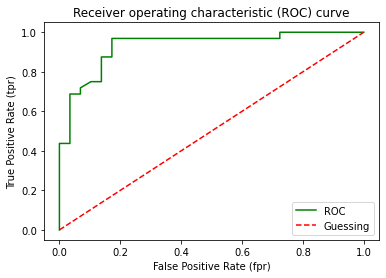

In [14]:
plot_roc(fpr, tpr)

# How to install a package from notebook in current environment

`import sys
!conda install --yes --prefix {sys.prefix} seaborn`

Here `prefix` stands for the path of the active environment.

`!` is the syntax for every running code of terminal

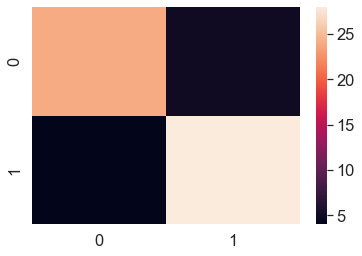

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# set the scale of the font
sns.set(font_scale=1.5)

# creating confusion matrix
cnf_mat = confusion_matrix(y_test, y_preds)

# creating a heat map
sns.heatmap(cnf_mat);

In [18]:
def plot_cnf_mat(cnf_mat):
    
    """
    Plotting confusion matrix by using seaborn
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(cnf_mat, 
                     annot=True, # if true then value will appear on the box in the map
                     cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label");


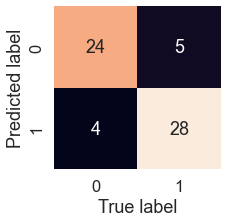

In [19]:
plot_cnf_mat(cnf_mat)

C:\Users\HP\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


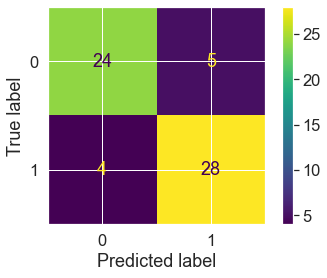

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

**Classification Report**

In [24]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000
